# Exploratory Data Analysis

In this section we will get familiar with our extracted cleaned data and try to visualize some useful information.

Starting with using shape to get rows cols length and looking at the actual data frame.

In [28]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import csv
import seaborn as sns


df = pd.read_csv("Amazon Items Cleaned.csv" )
print(df.shape)
df

(1636, 8)


,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
0,"NOCO NUSB211NA 10W USB Power Adapter, 2.1A 5V ...",NOCO,3869.0,0,0,28.0,13.95,4.7
1,Amazfit Band 5 Activity Fitness Tracker with A...,Amazfit,21158.0,0,0,1000.0,29.88,4.1
2,Amazon Basics Universal Travel Case Organizer ...,AmazonBasics,16242.0,0,1,277.0,14.44,4.6
3,"Amazon Glow with Tangram Bits | Learn, Play, R...",Amazon,215.0,0,1,31.0,329.98,4.4
4,"Echo Show 5 (2nd Gen, 2021 release) - Deep Sea...",Amazon,928.0,0,1,21.0,114.98,4.7
...,...,...,...,...,...,...,...,...
1631,American Eagle Gift Card,American Eagle,5999.0,0,0,4.0,25.00,4.9
1632,Amazon.com Gift Cards - As a Bookmark,Amazon,3950.0,0,0,15.0,100.00,4.9
1633,Amazon.com Gift Card in a Gift Tag,Amazon,7520.0,0,0,12.0,10.00,4.9
1634,"Amazon.com $10 Gift Cards, Pack of 3 (Holiday ...",Amazon,3014.0,0,0,3.0,30.00,4.9


First look on the data, using info we can tell the type for each feature.

In [29]:
# Non null means our data is full without missing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          1636 non-null   object 
 1   Brand         1636 non-null   object 
 2   Rating        1636 non-null   float64
 3   BestSeller    1636 non-null   int64  
 4   AmazonChoice  1636 non-null   int64  
 5   Comments      1636 non-null   float64
 6   Price         1636 non-null   float64
 7   Stars         1636 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 102.4+ KB


Checking data after cleaning using describe can give you useful information about unique values, means frequent values and so on.

In [30]:
df.describe(include='all')

,Name,Brand,Rating,BestSeller,AmazonChoice,Comments,Price,Stars
count,1636,1636,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000,1636.000000
unique,1442,789,NaN,NaN,NaN,NaN,NaN,NaN
top,The Franklin Mint Founding Fathers Coin Collec...,Amazon,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,71,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,7168.836797,0.028117,0.267726,73.822738,84.398833,4.468521
std,NaN,NaN,25972.522900,0.165359,0.442909,164.568799,211.353176,0.308997
min,NaN,NaN,1.000000,0.000000,0.000000,3.000000,2.120000,1.000000
25%,NaN,NaN,94.750000,0.000000,0.000000,7.000000,14.997500,4.300000
50%,NaN,NaN,624.000000,0.000000,0.000000,19.000000,26.980000,4.500000
75%,NaN,NaN,3637.250000,0.000000,1.000000,57.250000,59.952500,4.700000


Back to our research question, let's focus on the bestseller field and generate a frequency table for best seller items.

   BestSeller  Frequency          p
0           0       1590  97.188264
1           1         46   2.811736


<AxesSubplot:ylabel='BestSeller'>

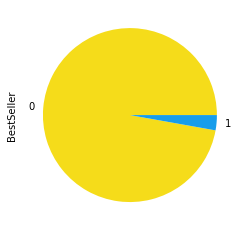

In [31]:
# Show the Frequency of the Best Sellers items with PIE visualization -------------------------------------------------------------------------------

counts = df["BestSeller"].value_counts()
p = df["BestSeller"].value_counts(normalize = True) * 100
index = [0,1]
FrequencyDF = pd.DataFrame({"BestSeller" : index,"Frequency": counts, "p" : p})
print(FrequencyDF)

myColors = ['#F5DC1A', '#179deb']
df['BestSeller'].value_counts().plot(kind = 'pie', colors = myColors)

As you can see about 2.8% are best sellers.

Checking for outliers on price with an histogram

Text(0, 0.5, 'Amount')

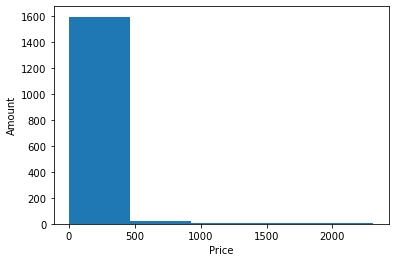

In [32]:
# We can see that most of the items in amazon are falling under the first section in the histogram price < 500 ------------------------------------------------

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

plt.hist(df.Price, bins = 5)
plt.xlabel("Price")
plt.ylabel("Amount")

Let's check if the items above 700 USD are Best Selleers

In [33]:
print(sum(df.Price > 700))


31


Let's use a boxplot to visualize outliers values for price.

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

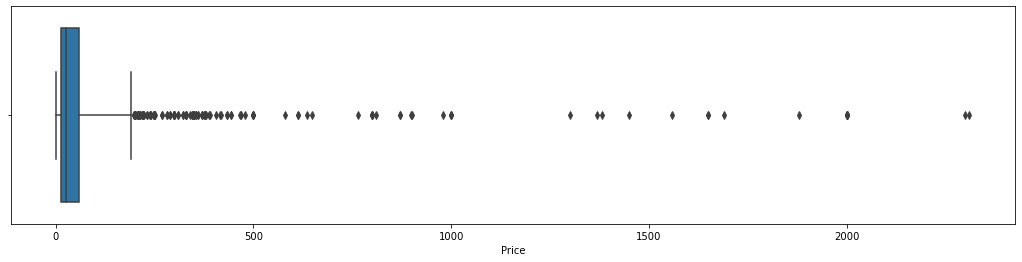

In [34]:
fig = plt.figure(figsize=(18,4))
sns.boxplot(df.Price, whis=3)

In [35]:
#('Outliers that are also a bestsellers'+ str(sum(df.Price > 700 and df.BestSeller == 1)))

Checking the outliers with IQR variable

In [36]:
Q1 = np.percentile(df["Price"], 25)
Q3 = np.percentile(df["Price"], 75)
IQR = Q3 - Q1

fareOutlierRows = df[(df["Price"] < Q1 - 1.5 * IQR) | (df["Price"] > Q3 + 1.5 * IQR )].index

print("The amount of outliers by IQR : " + str(len(fareOutlierRows)))

z_price = (df['Price'] - df['Price'].mean()) / df['Price'].std()
outliers = abs(z_price) > 3
print("We found that there are " + str(sum(outliers)) + " items above 700 USD")

min(df.Price[outliers])
df.Price[df.Price > 700] = np.nan
df = df.dropna(axis=0, thresh=8)
df["Price"].describe()

df.to_csv("Amazon Items Cleaned.csv", index=None)


The amount of outliers by IQR : 247
We found that there are 31 items above 700 USD


C:\Users\Yaniv\AppData\Local\Temp/ipykernel_20672/461335230.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Price[df.Price > 700] = np.nan


It is clear that we don't need the 31 outliers which non of them is a best seller.

After droping all prices outliers we can see the new boxplot which looks much better now.

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

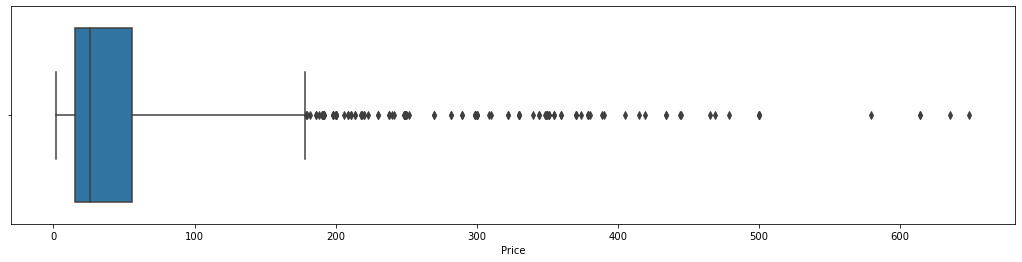

In [37]:
fig = plt.figure(figsize=(18,4))
sns.boxplot(df.Price, whis=3)

Checking for some correlation on Price and Comments values.

Text(0, 0.5, 'Comments')

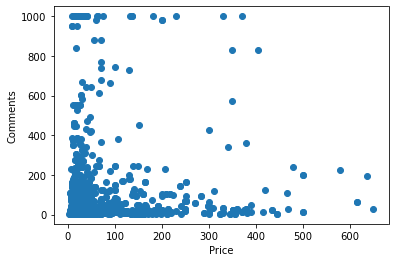

In [38]:
plt.scatter(df.Price, df.Comments)
plt.xlabel("Price")
plt.ylabel("Comments")

We don't see any linear pattern between prices and amount of comments on an item but we can see that items with price > 400 usd has less amount of comments generally.

Scaterring - Best Seller and Rating values

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BestSeller', ylabel='Rating'>

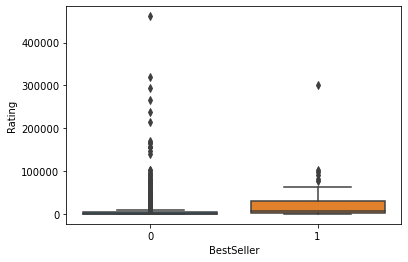

In [39]:
sns.boxplot(df.BestSeller, df.Rating)

Here we can see that the amount of ratings not always indicates if an item is a best seller or not.

Same thing on comments versus best seller.

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BestSeller', ylabel='Comments'>

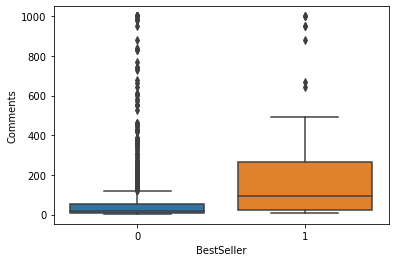

In [47]:
sns.boxplot(df.BestSeller, df.Comments)

We can see that the majority of bestsellers are with 0-300 comments, that indicates that comment alone is not a good indicator for finding bestseller among the items.

Price / Bestseller

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BestSeller', ylabel='Price'>

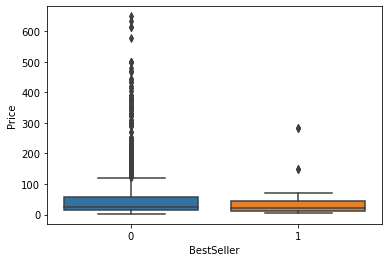

In [48]:
sns.boxplot(df.BestSeller, df.Price)


The majority are with price 0-100$

Let's try same thing with Stars - Best Seller -> Stars

c:\Users\Yaniv\anaconda3\envs\datascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BestSeller', ylabel='Stars'>

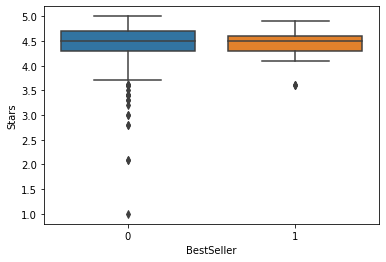

In [46]:
sns.boxplot(df.BestSeller, df.Stars)


Another way to look is using cross tabulation.

In [40]:
ct1 = pd.crosstab(df["Stars"], df["BestSeller"])
ct1

BestSeller,0,1
Stars,,
1.0,1,0
2.1,2,0
2.8,2,0
3.0,2,0
3.2,1,0
3.3,2,0
3.4,5,0
3.5,1,0
3.6,8,3


We can see that majority Best Seller items must have above 4.0 stars

Let's make a plot.

Text(0, 0.5, 'Best Seller')

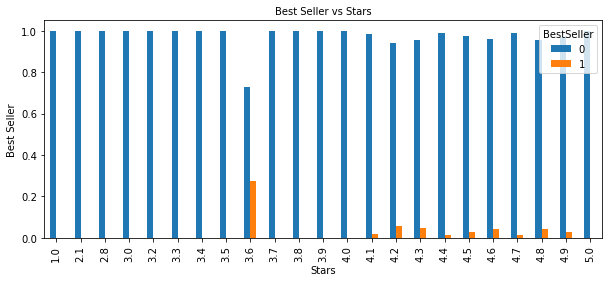

In [41]:
ct2 = pd.crosstab(df["Stars"], df["BestSeller"], normalize="index")
ct2.plot(kind = 'bar', figsize = (10,4))
plt.title('Best Seller vs Stars', fontsize = 10)
plt.xlabel('Stars')
plt.ylabel('Best Seller')

We found that there is some correlation, the majority of bestseller items has above 4.0 Stars 

Let's check our base assumption with the - Chi Test -

H0 = There is no correlation between Best Seller and Stars

In [42]:
from scipy.stats import chi2_contingency
chi2_contingency(ct1)

(38.90817150084312,
 0.014457635946154766,
 22,
 array([[9.71339564e-01, 2.86604361e-02],
        [1.94267913e+00, 5.73208723e-02],
        [1.94267913e+00, 5.73208723e-02],
        [1.94267913e+00, 5.73208723e-02],
        [9.71339564e-01, 2.86604361e-02],
        [1.94267913e+00, 5.73208723e-02],
        [4.85669782e+00, 1.43302181e-01],
        [9.71339564e-01, 2.86604361e-02],
        [1.06847352e+01, 3.15264798e-01],
        [1.55414330e+01, 4.58566978e-01],
        [9.71339564e+00, 2.86604361e-01],
        [2.81688474e+01, 8.31152648e-01],
        [4.85669782e+01, 1.43302181e+00],
        [5.92517134e+01, 1.74828660e+00],
        [8.25638629e+01, 2.43613707e+00],
        [1.24331464e+02, 3.66853583e+00],
        [2.29236137e+02, 6.76386293e+00],
        [2.59347664e+02, 7.65233645e+00],
        [2.39920872e+02, 7.07912773e+00],
        [2.31178816e+02, 6.82118380e+00],
        [1.31130841e+02, 3.86915888e+00],
        [6.41084112e+01, 1.89158879e+00],
        [9.71339564e+00, 2.8

P value < 0.05 therefore H0 is wrong and we do have a connection between Best Seller and Stars and we pick the H1

<AxesSubplot:xlabel='Price', ylabel='Stars'>

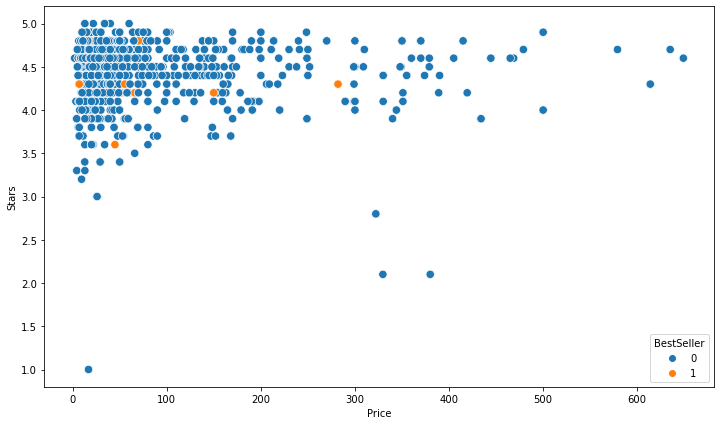

In [43]:
fig = plt.figure(figsize = (12,7))
sns.scatterplot(x = 'Price', y = 'Stars', s = 70, hue = 'BestSeller', data = df)

Here we see that if the price is low the item is most likely to be a best seller

3D scatter on Rating, Comments, Price values

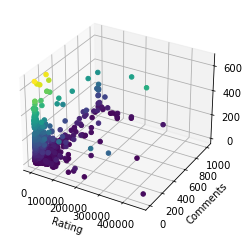

In [44]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection = '3d')

xdata = df.Rating
ydata = df.Comments
zdata = df.Price

plt.xlabel('Rating')
plt.ylabel('Comments')

ax.scatter3D(xdata,ydata,zdata,c = zdata,depthshade = False)

Pair plot for our useful fields.

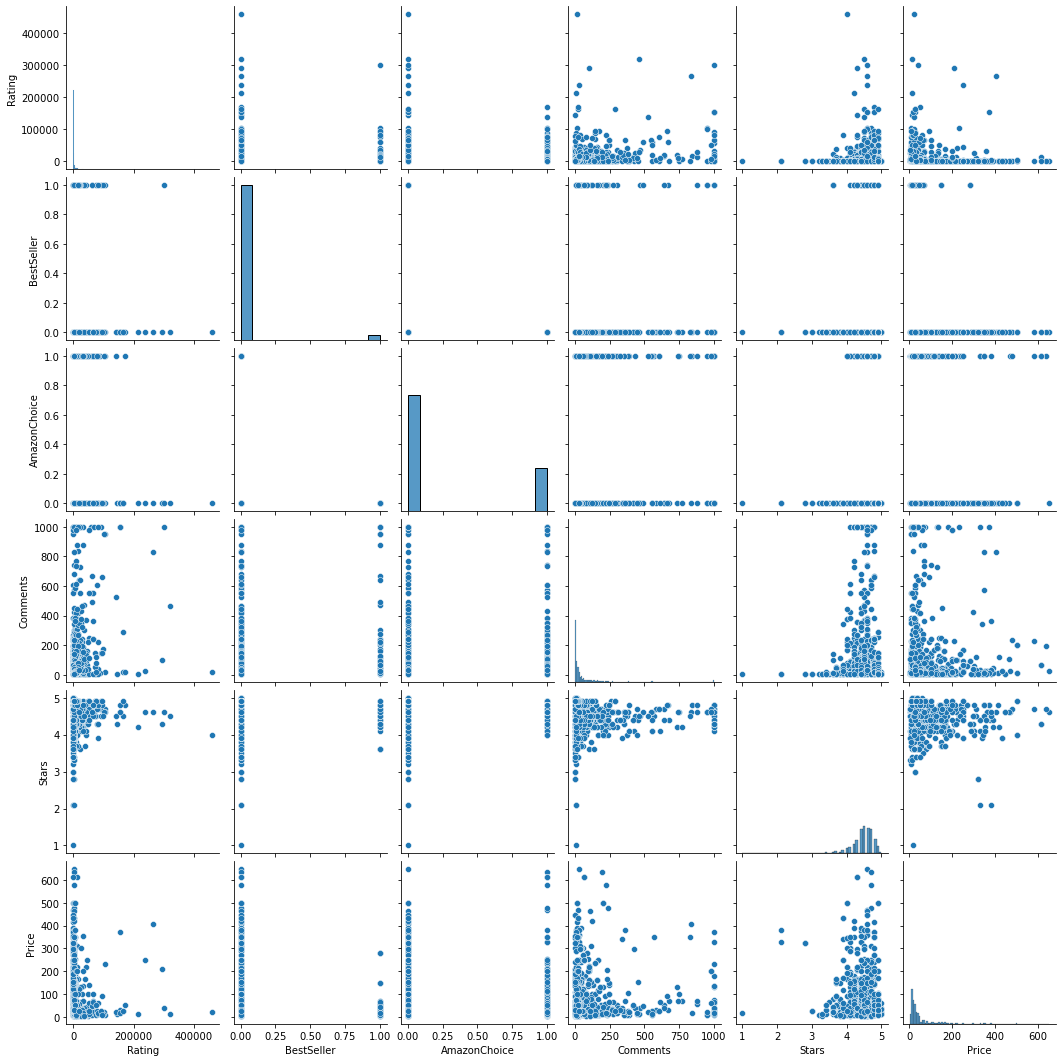

In [50]:
sns.pairplot(df[['Rating', 'BestSeller', 'AmazonChoice' ,'Comments', 'Stars', 'Price']])